In [ ]:
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import pandas as pd
file_path1 = '/content/drive/MyDrive/openAPI.txt'
with open(file_path1) as f:
    raw_review = f.read()
# Remove HTML
review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
# Convert to space
letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
# Small letter
words = letters_only.lower().split()
# Stopwords set
stops = set(stopwords.words('english'))
# Remove Stopwords
meaningful_words = [w for w in words if not w in stops]
# Extract stem
stemming_words = [ps.stem(w) for w in meaningful_words]
# Connect the strings w/ space
out=" ".join(stemming_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#1-1
print(len(stemming_words))
print(len(list(set(stemming_words))))

1026
487


In [ ]:
#1-2
count = 0
for x in stemming_words:
  if(x == 'api'):
    count += 1
print(count)


77


In [ ]:
#1-3
from collections import Counter
most_common_words = Counter(stemming_words).most_common(20)
most_common_words[2]

('web', 24)

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Word')]

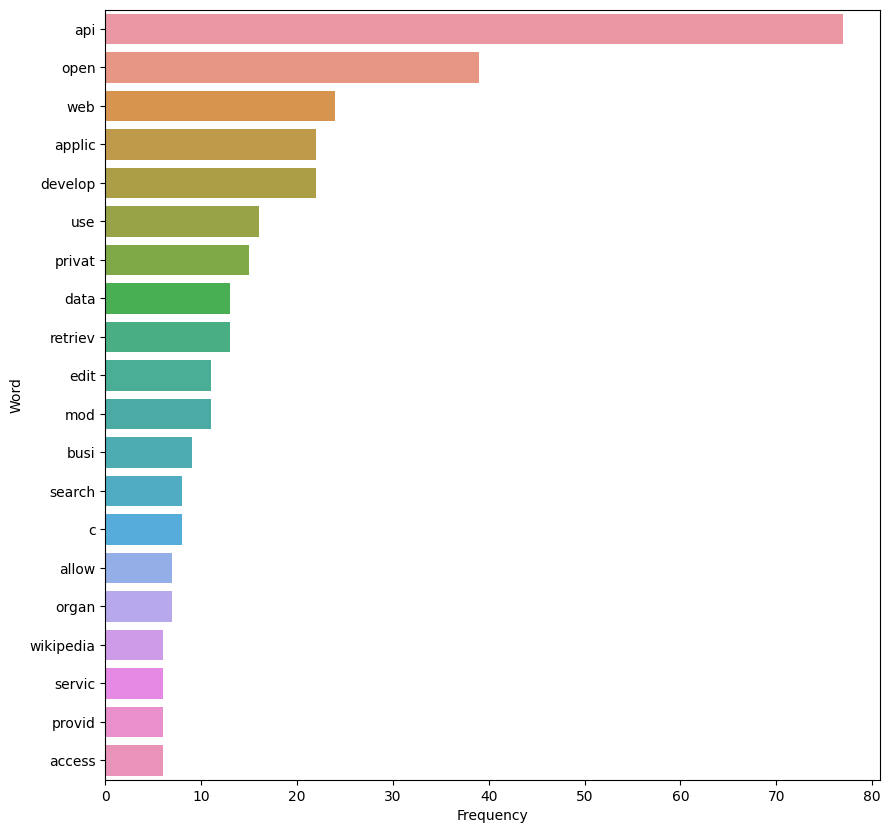

In [ ]:
#1-4
import matplotlib.pyplot as plt
import seaborn as sns
x, y = [], []
for word, count in most_common_words[:20]:
  x.append(word)
  y.append(count)
plt.figure(figsize = (10, 10))
ax = sns.barplot(x = y, y = x)
ax.set(xlabel = 'Frequency', ylabel = 'Word')

In [ ]:
#1-5
from nltk.tokenize import word_tokenize
from nltk.util  import ngrams
nltk.download('punkt')
def get_ngrams(text, n):
  n_grams = ngrams(word_tokenize(text), n)
  return [' '.join(grams) for grams in n_grams]
open_list = get_ngrams(out, 2)
api_counter = Counter(open_list).most_common(20)
for item in api_counter:
    if item[0] == 'open api':
      print(item)

('open api', 30)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Word')]

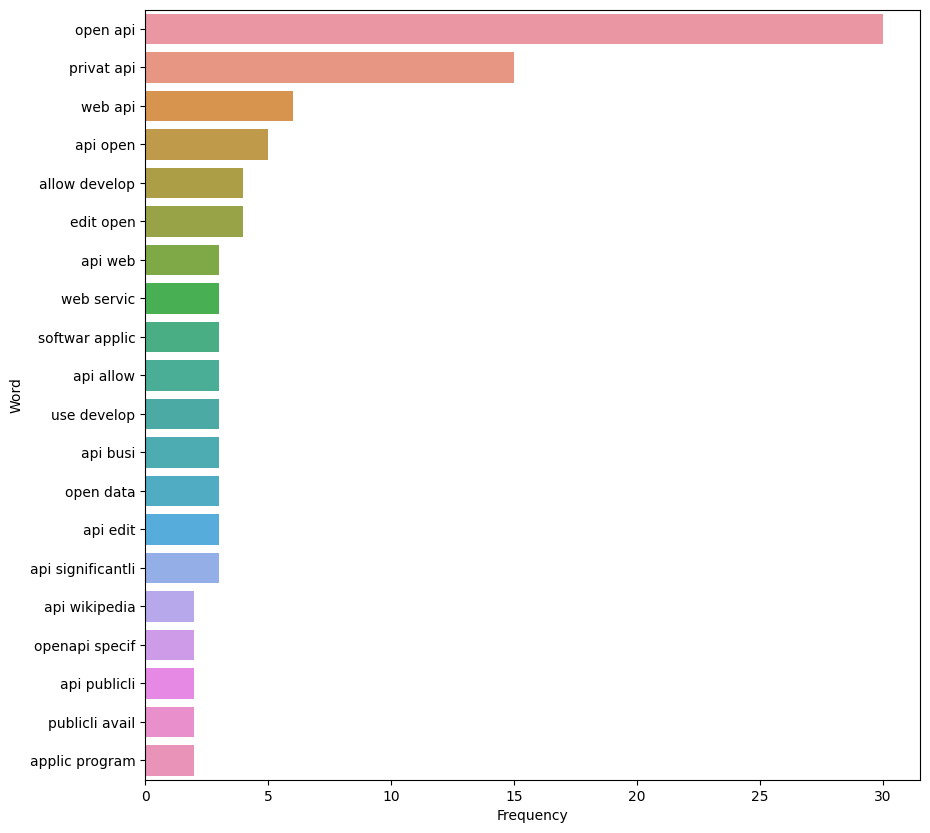

In [ ]:
#1-6
x, y = [], []
for word, count in api_counter[:20]:
  x.append(word)
  y.append(count)
plt.figure(figsize = (10, 10))
ax = sns.barplot(x = y, y = x)
ax.set(xlabel = 'Frequency', ylabel = 'Word')

In [ ]:
#2=1
import os

# Change the current directory to '/content/coin'
os.chdir('/content/drive/MyDrive/coin')

path = '/content/drive/MyDrive/coin'
file_list = os.listdir(path)
file_list_txt = [file for file in file_list if file.endswith('.txt')]
print(file_list_txt)

with open('coinzip.txt', 'wb') as outfile:
    for filename in file_list_txt:
        with open(filename, 'rb') as infile:
            outfile.write(infile.read())


['0001.txt', '0003.txt', '0004.txt', '0007.txt', '0005.txt', 'coinzip.txt']


In [ ]:
#2-2
with open('coinzip.txt', 'rt', encoding = 'utf-8') as result:
  data1 = result.read()
print(type(data1))
# Convert to space
letters_only = re.sub('[^a-zA-Z]', ' ', data1)
# Small letter
words = letters_only.lower().split()
# Stopwords set
stops = set(stopwords.words('english'))
# Remove Stopwords
meaningful_words = [w for w in words if not w in stops]
# Extract stem
stemming_words = [ps.stem(w) for w in meaningful_words]
out=" ".join(stemming_words)
most_common_words = Counter(stemming_words).most_common(20)
most_common_words[1]


<class 'str'>


('network', 316)

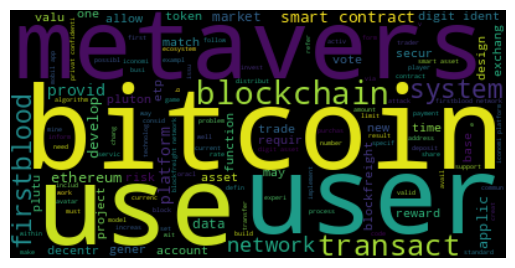

In [ ]:
#2-3
from wordcloud import WordCloud
wordcloud = WordCloud().generate(out)
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear') #이미지를 출력
plt.show()